In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [4]:
df3=pd.read_csv('gender_submission.csv')

In [5]:
df3.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


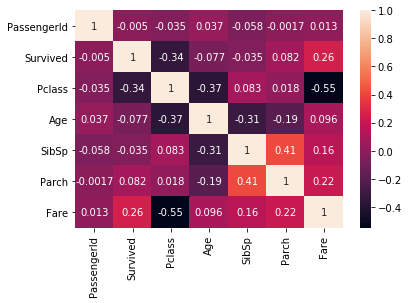

In [8]:
sns.heatmap(df_train.corr(),annot=True)


In [9]:
df_train.max(axis = 0) 

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [10]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df_train = df_train.drop(['Cabin','Name'], axis = 1)
df_test = df_test.drop(['Cabin','Name'], axis = 1)

In [13]:
df_train['Age'].mean()

29.69911764705882

In [14]:
df_train['Age'].fillna(value=30,inplace=True)
df_test['Age'].fillna(value=30,inplace=True)

In [15]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
sex1= pd.get_dummies(df_test['Sex'],drop_first=True)

In [16]:
df_train.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)
df_test.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)

In [17]:
df_train = pd.concat([df_train,sex],axis=1)
df_test = pd.concat([df_test,sex1],axis=1)

In [18]:
df_train['Fare'].mean()

32.2042079685746

In [19]:
df_train[df_train['Fare'].isnull()==True]=32

In [20]:
X=df_train.drop('Survived',axis=1)
y=df_train['Survived']

In [21]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=35)

In [23]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(X_train,y_train)
predictions=log.predict(X_test)


In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       106
           1       0.76      0.75      0.76        73

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



[[89 17]
 [18 55]]


In [27]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train,y_train)

from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors = 5)
model3.fit(X_train,y_train)

from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(X_train,y_train)

from xgboost import XGBClassifier
model6 = XGBClassifier()
model6.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
prediction2 = model2.predict(X_test)
prediction3 = model3.predict(X_test)
prediction4 = model4.predict(X_test)
prediction5 = model5.predict(X_test)
prediction6 = model6.predict(X_test)

In [29]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       106
           1       0.80      0.73      0.76        73

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [30]:
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       106
           1       0.81      0.74      0.77        73

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [31]:
print(classification_report(y_test,prediction4))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       106
           1       0.75      0.78      0.77        73

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



In [32]:
print(classification_report(y_test,prediction5))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       106
           1       0.80      0.77      0.78        73

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [33]:
print(classification_report(y_test,prediction6))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       106
           1       0.82      0.74      0.78        73

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [34]:
s2=pd.DataFrame(df_test['PassengerId'])

In [35]:
s2.shape

(418, 1)

In [36]:
s3=pd.DataFrame(predictions)

In [37]:
s3.shape

(179, 1)

In [38]:
s2

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [39]:
s3

,0
0,0
1,1
2,1
3,0
4,1
...,...
174,0
175,0
176,0
177,0
